# Particule dans un cyclotron

## Introduction
Dans ce compte-rendu, Nous allons étudier comment accélérer un proton dans le cyclotron.

## Modèle
Un cyclotron comporte trois parties. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 

In [10]:
tau = 0.5

# Créer un tableau contenant les instants de sortie des boucles "D"
n = np.arange(0,51,1)
epsilon_n = (-1)**n
t_n = n + tau * np.sqrt(n)

2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.

In [11]:
# Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.
print(f"t_1 = 1.5 ?   {(1.5-(10e-6) <= t_n[1] and t_n[0] <= 1.5+(10e-6)) }")
print(f"t_4 = 5 ?     {(5-(10e-6) <= t_n[4] and t_n[3] <= 5+(10e-6)) }")
print(f"t_9 = 10.5 ?  {(10.5-(10e-6) <= t_n[9] and t_n[8] <= 10.5+(10e-6)) }")
print(f"t_16 = 18 ?   {(18-(10e-6) <= t_n[16] and t_n[15] <= 18+(10e-6)) }")
print(f"t_25 = 27.5 ? {(27.5-(10e-6) <= t_n[25] and t_n[24] <= 27.5+(10e-6)) }")

t_1 = 1.5 ?   True
t_4 = 5 ?     True
t_9 = 10.5 ?  True
t_16 = 18 ?   True
t_25 = 27.5 ? True


3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 

In [12]:
# Nous réalisons cela à l'aide d'une fonction qui prend en entrée n et retourne les vitesses et le temps correspondantes,
# dans le cas où le proton est dans la région supérieur.

def v(n, step_t = 0.01):
    start = t_n[n+1] - 1
    end = t_n[n+1]

    num_point = int((end-start) / step_t ) + 1
    t = np.linspace(start,end,num_point)
    v_x = epsilon_n[n] * np.sqrt(n+1) * np.sin(np.pi * (t-end))
    v_y = -epsilon_n[n] * np.sqrt(n+1) * np.cos(np.pi * (t-end))
    return v_x, v_y, t

4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.

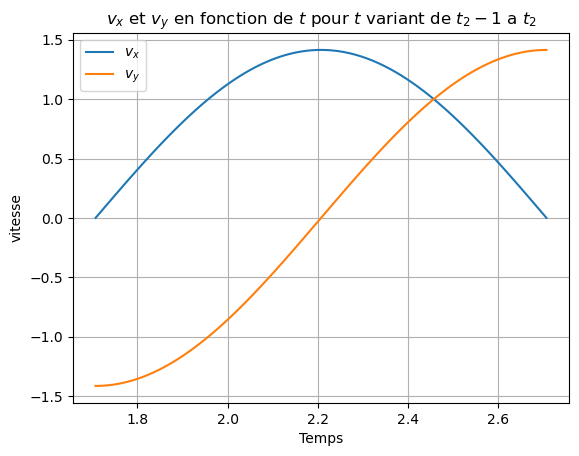

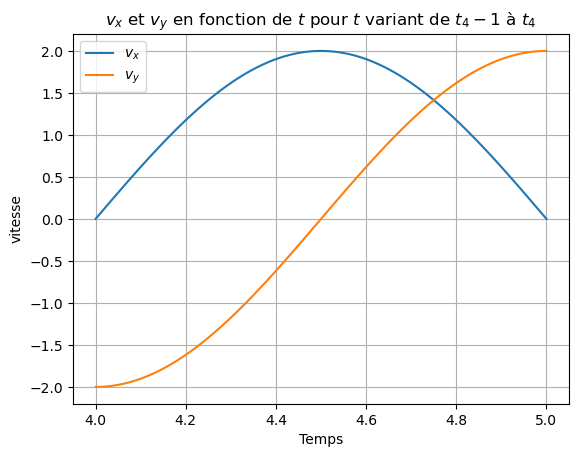

In [14]:
# Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.
v_x2, v_y2, t2 = v(1)
plt.plot(t2, v_x2, label = r'$v_x$')
plt.plot(t2, v_y2, label = r'$v_y$')
plt.xlabel('Temps')
plt.ylabel('vitesse')
plt.title("$v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$")
plt.grid()
plt.legend()
plt.show()

v_x4, v_y4, t4 = v(3)
plt.plot(t4, v_x4, label = r'$v_x$')
plt.plot(t4, v_y4, label = r'$v_y$')
plt.xlabel('Temps')
plt.ylabel('vitesse')
plt.title("$v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_4-1$ à $t_4$")
plt.grid()
plt.legend()
plt.show()

5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [15]:
#Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.
print(f"Pour t variant de t_2-1 à t_2: \n    v_x atteint son maximum {np.max(v_x2):.3f} à t = {t2[np.argmax(v_x2)] : .3f}, \n    v_y atteint son maximum {np.max(v_y2):.3f} à t = {t2[np.argmax(v_y2)] : .3f}")
print("\n")
print(f"Pour t variant de t_4-1 à t_4: \n    v_x atteint son maximum {np.max(v_x4):.3f} à t = {t4[np.argmax(v_x4)] : .3f}, \n    v_y atteint son maximum {np.max(v_y4):.3f} à t = {t4[np.argmax(v_y4)] : .3f}")

Pour t variant de t_2-1 à t_2: 
    v_x atteint son maximum 1.414 à t =  2.207, 
    v_y atteint son maximum 1.414 à t =  2.707


Pour t variant de t_4-1 à t_4: 
    v_x atteint son maximum 2.000 à t =  4.500, 
    v_y atteint son maximum 2.000 à t =  5.000


On voit que les vitesse sont augementées au cours du temps

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.

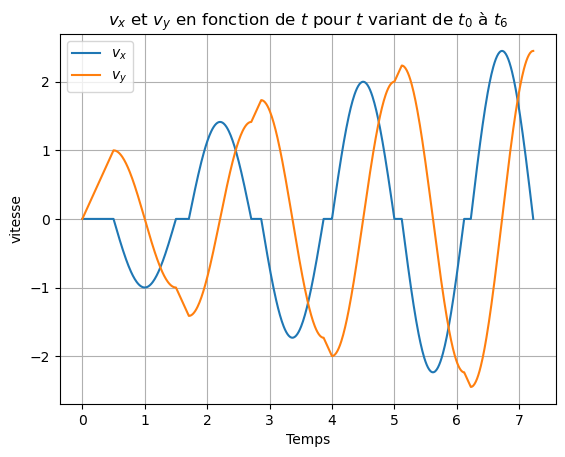

In [16]:
def v_milieu(n, step_t = 0.01):
    start = t_n[n]
    end = t_n[n+1] - 1

    num_point = int((end-start) / step_t ) + 1
    t = np.linspace(start,end,num_point)
    v_x = 0 * t
    v_y = epsilon_n[n] * (np.sqrt(n) + (t - start)/tau)
    return v_x, v_y, t

def v_generale(n_end, n_start = 0):
    vx_res, vy_res, t_res = ([],[],[])
    while n_start < n_end:
        vx, vy, t = v_milieu(n_start)
        vx_res = np.concatenate((vx_res,vx))
        vy_res = np.concatenate((vy_res,vy))
        t_res = np.concatenate((t_res,t))
        
        vx, vy, t = v(n_start)
        vx_res = np.concatenate((vx_res,vx))
        vy_res = np.concatenate((vy_res,vy))
        t_res = np.concatenate((t_res,t))
        n_start += 1
    return vx_res, vy_res, t_res

v_x, v_y, t = v_generale(6)
plt.plot(t, v_x, label = r'$v_x$')
plt.plot(t, v_y, label = r'$v_y$')
plt.xlabel('Temps')
plt.ylabel('vitesse')
plt.title("$v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_0$ à $t_6$")
plt.grid()
plt.legend()
plt.show()

7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?

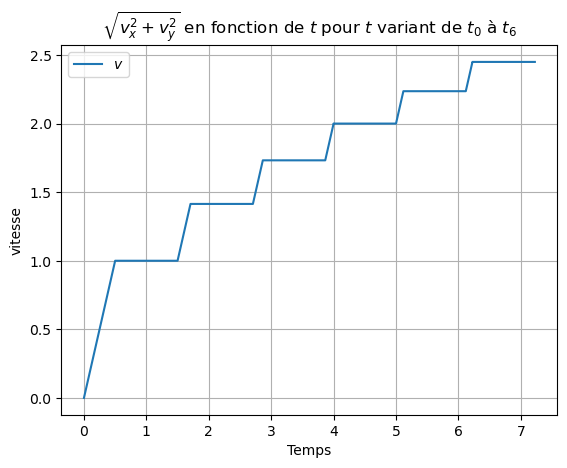

In [17]:
plt.plot(t, np.sqrt(v_x**2 + v_y**2), label = r'$v$')
plt.xlabel('Temps')
plt.ylabel('vitesse')
plt.title("$\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $t_0$ à $t_6$")
plt.grid()
plt.legend()
plt.show()

8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

pour le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ à $t_n$, on remarque que 
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} \right)
$$
donc,
$$
\sqrt{v_x(t_n)^2+v_y(t_n)^2} = |\epsilon_n| \left( \sqrt{n} \right)
$$

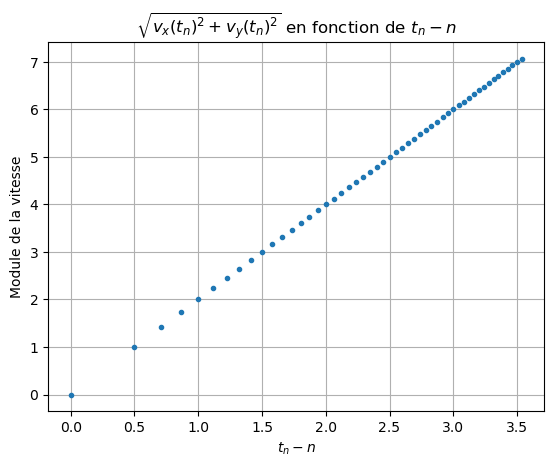

In [19]:
v_module = np.abs(epsilon_n)*np.sqrt(n)

plt.plot(t_n-n, v_module, ".")
plt.xlabel('$t_n - n$')
plt.ylabel('Module de la vitesse')
plt.title("$\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$")
plt.grid()
plt.show()

On voit que à chaque passage de la région d'accélération, le module de la vitesse augemente de moins en moins.